In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


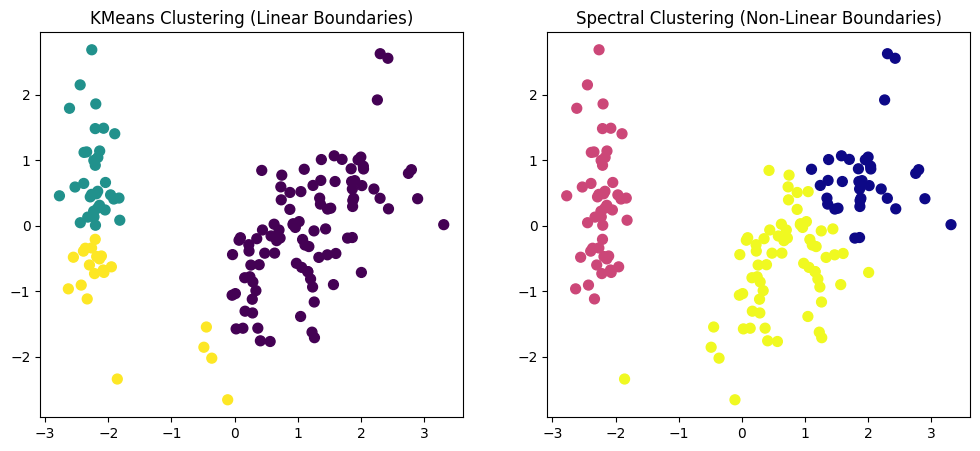

In [14]:
# Load iris dataset (make sure iris.csv is in the same folder)
df = pd.read_csv(r"C:\Users\mhema\OneDrive\Desktop\DataScience\MachineLearning\Artifacts\iris.csv")

# Drop label column for clustering (unsupervised)
X = df.drop("variety", axis=1)

# Standardize features for better clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------- KMeans (linear boundary clustering) ----------
kmeans = KMeans(n_clusters=3, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

# # ---------- Spectral Clustering (non-linear clustering) ----------
spectral = SpectralClustering(n_clusters=3, affinity="nearest_neighbors", random_state=42)
df["Spectral_Cluster"] = spectral.fit_predict(X_scaled)

# ---------- Visualization ----------
# Use PCA to reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))

# KMeans plot
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["KMeans_Cluster"], cmap="viridis", s=50)
plt.title("KMeans Clustering (Linear Boundaries)")

# # Spectral Clustering plot
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Spectral_Cluster"], cmap="plasma", s=50)
plt.title("Spectral Clustering (Non-Linear Boundaries)")

plt.show()